In [2]:
# importing the main libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# for the ML stuff
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [4]:
# lets upload the file from my pc
print("Uploading Iris.csv...")
uploaded = files.upload()

# read the csv into a dataframe called df
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

print("File loaded successfully!")

Uploading Iris.csv...


Saving Iris.csv to Iris (1).csv
File loaded successfully!


In [5]:
# print the first 5 rows
print("Top 5 rows:")
print(df.head())

# get info on columns and if any data is missing
print("\nData info:")
df.info()

Top 5 rows:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+

In [6]:
# dropping the id column, it's not a feature
df = df.drop('Id', axis=1)

print("\nDropped the Id column.")


Dropped the Id column.


Counts of each species:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


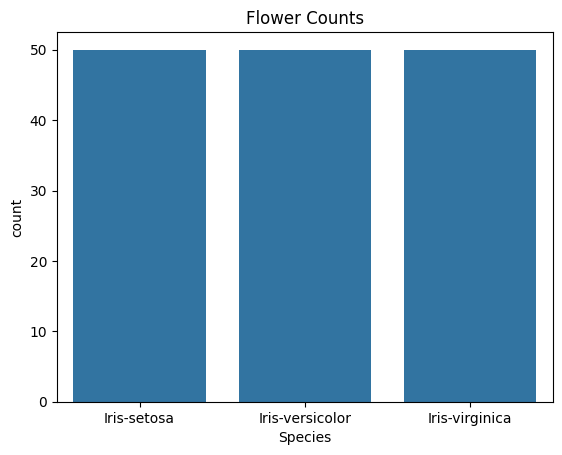

In [7]:
# checking the counts of each species
print("Counts of each species:")
print(df['Species'].value_counts())

# a quick plot to see this visually
sns.countplot(x='Species', data=df)
plt.title('Flower Counts')
plt.show()

In [8]:
# X is everything but the 'Species' column
X = df.drop('Species', axis=1)
# y is just the 'Species' column
y = df['Species']

# model needs numbers, not text names
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# just to be sure what number maps to what species
print("\nMapping of species to numbers:")
print(dict(zip(le.classes_, le.transform(le.classes_))))


Mapping of species to numbers:
{'Iris-setosa': np.int64(0), 'Iris-versicolor': np.int64(1), 'Iris-virginica': np.int64(2)}


In [9]:
# splitting into 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# checking the shape to be sure it split correctly
print("\nShapes of my new data sets:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


Shapes of my new data sets:
X_train shape: (120, 4)
X_test shape: (30, 4)


In [10]:
# creating the logistic regression model
my_model = LogisticRegression()

# training the model with my training data
my_model.fit(X_train, y_train)
print("\nModel is trained!")

# making predictions on the test data
predictions = my_model.predict(X_test)

# checking the final score
accuracy = accuracy_score(y_test, predictions)
print(f"\nFinal Accuracy: {accuracy * 100:.2f}%")

# printing the detailed report to see how it did on each flower type
print("\nFull Report:")
print(classification_report(y_test, predictions, target_names=le.classes_))


Model is trained!

Final Accuracy: 100.00%

Full Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

